In [4]:
using CSV, DataFrames, Plots, Statistics, StatsPlots, Dates, StatsBase
total_df = CSV.read("accepted_2007_to_2018Q4.csv")
size(total_df)

(2260701, 151)

## Cleaning

In [5]:
df = total_df[sample(axes(total_df,1), 100000; replace=false, ordered=true), :];

In [6]:
for i in names(df)
    println(i)
end

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [7]:
first(df, 5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
,String,Missing,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰
1,68426831,missing,11950.0,11950.0,11950.0,36 months,13.44
2,68466926,missing,10000.0,10000.0,10000.0,36 months,6.49
3,68547583,missing,8650.0,8650.0,8650.0,36 months,5.32
4,68525943,missing,20000.0,20000.0,20000.0,36 months,12.88
5,68366999,missing,15850.0,15850.0,15850.0,60 months,23.13


In [8]:
columns = [:loan_amnt, :issue_d, :term, :int_rate, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [9]:
data = df[:, columns];

In [10]:
for col in columns
    println(col, ": ", sum(ismissing.(data[:, col])))
end

loan_amnt: 1
issue_d: 1
term: 1
int_rate: 1
installment: 1
grade: 1
sub_grade: 1
emp_title: 7366
emp_length: 6491
home_ownership: 1
annual_inc: 1
pymnt_plan: 1
purpose: 1
title: 1060
zip_code: 1
addr_state: 1
dti: 64
delinq_2yrs: 2
earliest_cr_line: 2
inq_last_6mths: 2
mths_since_last_delinq: 51250
mths_since_last_record: 84280
open_acc: 2
pub_rec: 2
total_acc: 2
total_pymnt: 1
total_pymnt_inv: 1
recoveries: 1
last_pymnt_d: 99
last_pymnt_amnt: 1
next_pymnt_d: 59551
last_credit_pull_d: 5
annual_inc_joint: 94635
dti_joint: 94635
acc_now_delinq: 2
tot_coll_amt: 3080
tot_cur_bal: 3080
open_acc_6m: 38386
acc_open_past_24mths: 2158
delinq_amnt: 2


In [11]:
required = [:loan_amnt, :term, :int_rate, :installment, :grade,
            :sub_grade, :home_ownership, :annual_inc, :pymnt_plan,
            :zip_code, :addr_state, :dti, :issue_d, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :open_acc, :pub_rec,
            :total_acc, :total_pymnt, :total_pymnt_inv, :recoveries,
            :last_pymnt_amnt, :last_credit_pull_d, :acc_now_delinq, :delinq_amnt];

In [12]:
data = dropmissing(data, required);

In [13]:
describe(data)

,variable,mean,min,median
,Symbol,Union…,Any,Union…
1,loan_amnt,15014.7,950.0,12800.0
2,issue_d,,Apr-2008,
3,term,,36 months,
4,int_rate,13.0889,5.31,12.62
5,installment,444.706,19.87,377.37
6,grade,,A,
7,sub_grade,,A1,
8,emp_title,,\tAuto Body Repair,
9,emp_length,,1 year,


In [14]:
data[!, :issue_d] = Date.(data[:, :issue_d], Dates.DateFormat("u-y"));

In [15]:
features = [:loan_amnt, :issue_d, :term, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [16]:
viz = by(data, [:issue_d, :grade], :int_rate => x -> sum(x)/size(x, 1))
viz = sort(viz, [:issue_d, :grade]);

In [17]:
x_vals = unique(Dates.year.(viz[:, :issue_d]));
x_dates = Date.(x_vals);

In [18]:
for col in columns
    if sum(ismissing.(data[:, col])) > 0
        println(col, ": ", sum(ismissing.(data[:, col])))
    end
end

emp_title: 7306
emp_length: 6431
title: 1059
mths_since_last_delinq: 51201
mths_since_last_record: 84220
last_pymnt_d: 98
next_pymnt_d: 59530
annual_inc_joint: 94629
dti_joint: 94629
tot_coll_amt: 3078
tot_cur_bal: 3078
open_acc_6m: 38382
acc_open_past_24mths: 2156


## Feature Transformations

In [19]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), size(cats, 1))
    for i in 1:size(cats, 1)
        for j in 1:size(column, 1)
            if cats[i] == column[j]
                result[j, i] = 1
            end
        end
    end
    result
end

function manyhot(column, cats=unique(col))
    result = zeros(size(column, 1), size(cats, 1))
    for i in 1:size(column, 1)
        set_of_descriptions = column[i]
        for description in set_of_descriptions
            for j in 1:size(cats, 1)
                if description == cats[j]
                    result[i, j] = 1
                end
            end
        end
    end
    result
end

manyhot (generic function with 2 methods)

In [20]:
onehot(data[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])

99931×7 Array{Float64,2}:
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮       
 0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0

## Visualizations

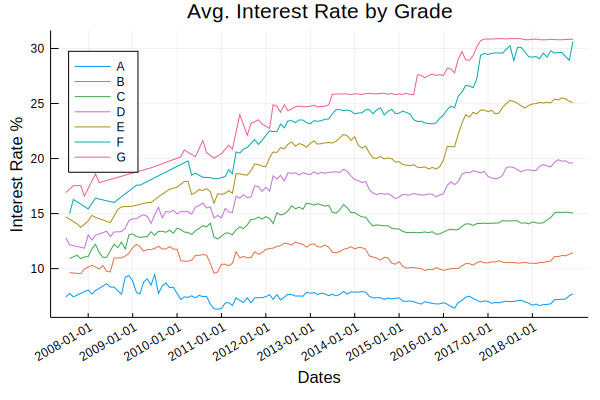

In [21]:
@df viz plot(:issue_d, :int_rate_function, group=:grade, xrotation=30, legend=:topleft, xticks=x_dates, xlabel="Dates", ylabel="Interest Rate %", title="Avg. Interest Rate by Grade")

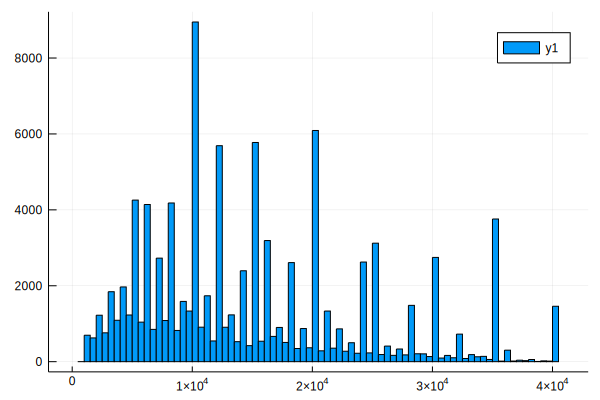

In [22]:
@df data histogram(:loan_amnt)

In [23]:
rates = zeros(size(unique(data.addr_state), 1))
states = []
i = 1
for state in unique(data.addr_state)
    d = filter(row->row.addr_state == state, data)
    μ = mean(d.int_rate)
    rates[i] = μ
    push!(states, state)
    i += 1
end

In [24]:
size(states)

(51,)

In [25]:
size(rates)

(51,)

In [26]:
graph = hcat(states, rates);

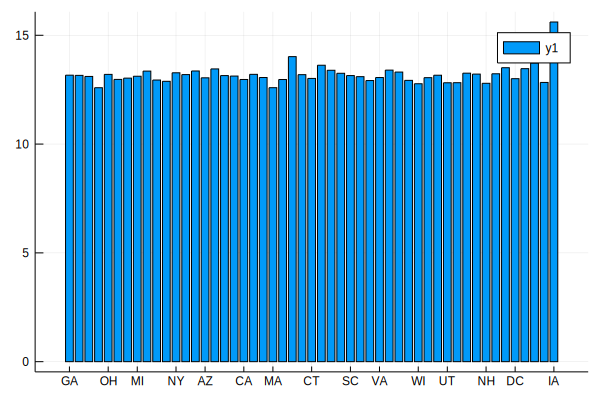

In [27]:
bar(states, rates)

In [28]:
zip_rates = zeros(size(unique(data.zip_code), 1))
zips = []
i = 1
for zip in unique(data.zip_code)
    d = filter(row->row.zip_code == zip, data)
    μ = mean(d.int_rate)
    zip_rates[i] = μ
    push!(zips, zip)
    i += 1
end

In [29]:
zips_graph = hcat(zips, zip_rates)
zips_graph = sort(DataFrame(zips_graph), :x2);

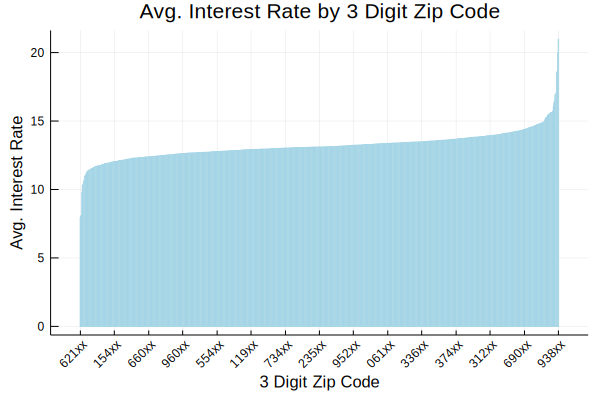

In [81]:
@df zips_graph bar(:x1, :x2, legend=false, linecolor=:lightblue, xrotation=45, title="Avg. Interest Rate by 3 Digit Zip Code")
xlabel!("3 Digit Zip Code")
ylabel!("Avg. Interest Rate")

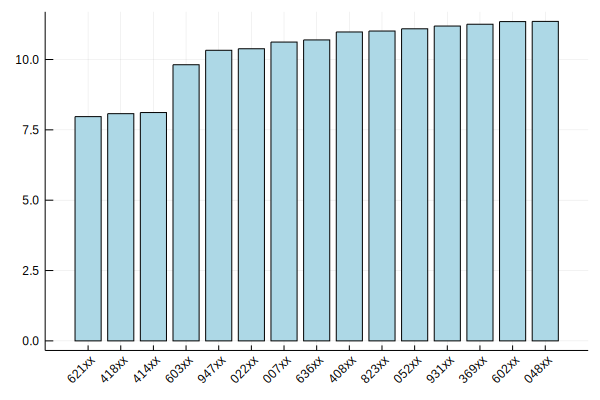

In [77]:
@df zips_graph bar(:x1[1:15], :x2[1:15], color=:lightblue, xrotation=45, legend=false)

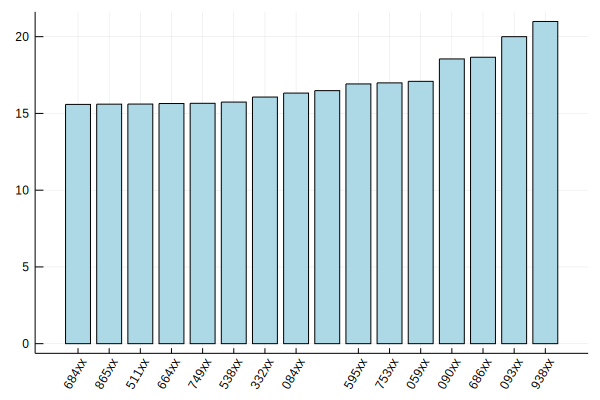

In [79]:
@df zips_graph bar(:x1[end-15:end], :x2[end-15:end], color=:lightblue, xrotation=60, legend=false)

In [31]:
data = sort(data, :loan_amnt);

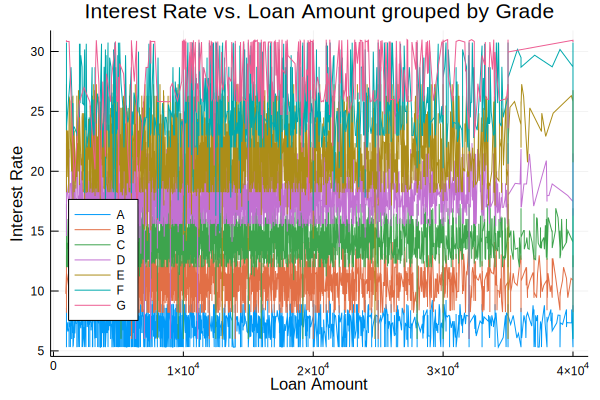

In [32]:
@df data plot(:loan_amnt, :int_rate, groups=:grade, legend=:bottomleft)
xlabel!("Loan Amount")
ylabel!("Interest Rate")
title!("Interest Rate vs. Loan Amount grouped by Grade")

In [54]:
grade_counts = []
grades = []
for g in ["A", "B", "C", "D", "E", "F", "G"]
    d = filter(row->row.grade == g, data)
    count = size(d.grade, 1)
    push!(grades, g)
    push!(grade_counts, count)
end

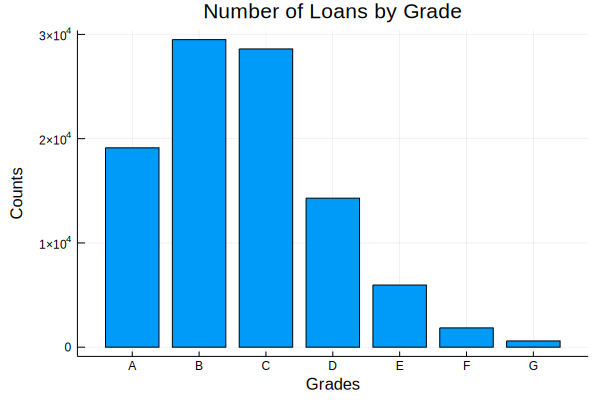

In [57]:
bar(grades, grade_counts, legend=false, xlabel="Grades", ylabel="Counts", title="Number of Loans by Grade")

## Preliminary Models

In [40]:
function abs_error(y, pred)
    return mean(abs.(y .- pred))
end

function MSE(y, pred)
    return mean((y .- pred) .^ 2)
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:red, legend=:topleft)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000; zeromin=true)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted", "True", zeromin=zeromin)
end

plot_pred_true

In [34]:
X = data[:, features]
Y = data[:, :int_rate];

In [35]:
split = floor(Int, size(X, 1) * 0.8)
X_train = X[1:split, :]
X_test = X[split+1:end, :]
Y_train = Y[1:split, :]
Y_test = Y[split+1:end, :];

In [36]:
println(size(X_train))
println(size(X_test))

(79944, 39)
(19987, 39)


Train MSE	2.076889507473219
Test MSE 	2.366089066667245
Train Error	1.1198562173121593
Test Error	1.1760216641448018


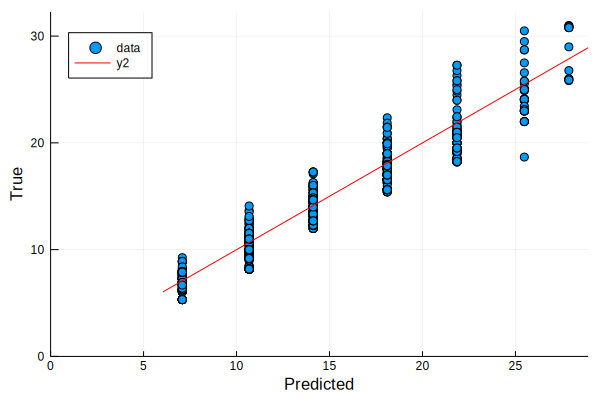

In [41]:
w_grades = hcat(ones(size(X_train, 1)), onehot(X_train[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) \ Y_train

train_grades_pred = hcat(ones(size(X_train, 1)), onehot(X_train[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) * w_grades
test_grades_pred = hcat(ones(size(X_test, 1)), onehot(X_test[:, :grade], ["A", "B", "C", "D", "E", "F", "G"])) * w_grades

train_MSE = MSE(Y_train, train_grades_pred)
test_MSE = MSE(Y_test, test_grades_pred)

train_error = abs_error(Y_train, train_grades_pred)
test_error = abs_error(Y_test, test_grades_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

println("Train Error\t", train_error)
println("Test Error\t", test_error)

plot_pred_true(test_grades_pred, Y_test)

Train MSE	21.786231791121327
Test MSE 	29.2157681293314
Train error	3.6600300865462194
Test error	4.211542773092977


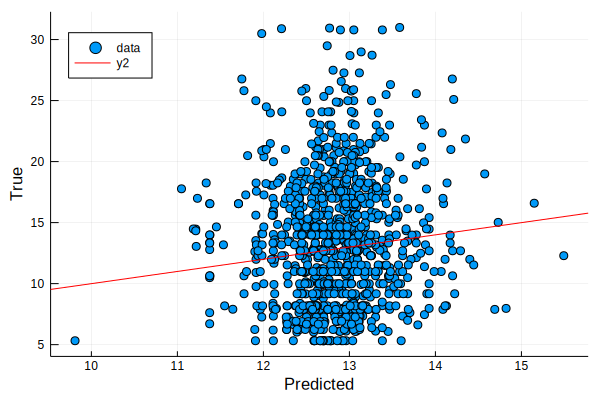

In [43]:
X_zips = onehot(X[:, :zip_code])
X_zips_train = X_zips[1:split, :]
X_zips_test = X_zips[split+1:end, :]

w_zips = hcat(ones(size(X_zips_train, 1)), X_zips_train) \ Y_train

train_zips_pred = hcat(ones(size(X_zips_train, 1)), X_zips_train) * w_zips
test_zips_pred = hcat(ones(size(X_zips_test, 1)), X_zips_test) * w_zips

train_MSE = MSE(Y_train, train_zips_pred)
test_MSE = MSE(Y_test, test_zips_pred)

train_error = abs_error(Y_train, train_zips_pred)
test_error = abs_error(Y_test, test_zips_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

println("Train error\t", train_error)
println("Test error\t", test_error)

plot_pred_true(test_zips_pred, Y_test, zeromin=false)

Train MSE	21.67563042313473
Test MSE 	28.909941440043085
Train error	3.6376938912899646
Test error	4.175146889335454


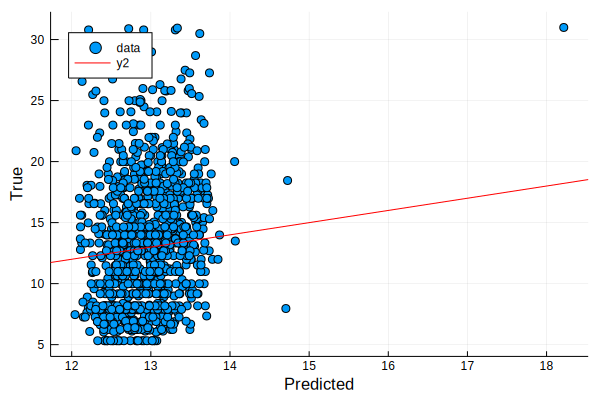

In [44]:
w_dti = hcat(ones(size(X_train, 1)), X_train[:, :dti]) \ Y_train

train_dti_pred = hcat(ones(size(X_train, 1)), X_train[:, :dti]) * w_dti
test_dti_pred = hcat(ones(size(X_test, 1)), X_test[:, :dti]) * w_dti

train_MSE = MSE(Y_train, train_dti_pred)
test_MSE = MSE(Y_test, test_dti_pred)

train_error = abs_error(Y_train, train_dti_pred)
test_error = abs_error(Y_test, test_dti_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

println("Train error\t", train_error)
println("Test error\t", test_error)

plot_pred_true(test_dti_pred, Y_test, zeromin=false)

Train MSE	22.00684891369961
Test MSE 	28.928686539963415
Train error	3.6784776375347046
Test error	4.187443197607631

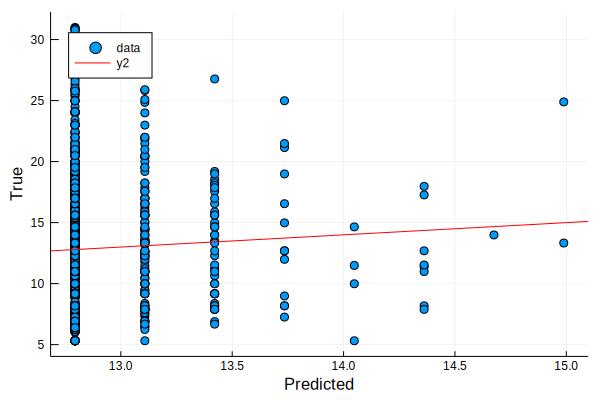

In [47]:
w_delinq = hcat(ones(size(X_train, 1)), X_train[:, :delinq_2yrs]) \ Y_train

train_delinq_pred = hcat(ones(size(X_train, 1)), X_train[:, :delinq_2yrs]) * w_delinq
test_delinq_pred = hcat(ones(size(X_test, 1)), X_test[:, :delinq_2yrs]) * w_delinq

train_MSE = MSE(Y_train, train_delinq_pred)
test_MSE = MSE(Y_test, test_delinq_pred)

train_error = abs_error(Y_train, train_delinq_pred)
test_error = abs_error(Y_test, test_delinq_pred)
        
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

println("Train error\t", train_error)
println("Test error\t", test_error)

plot_pred_true(test_delinq_pred, Y_test, zeromin=false)